

```
Importing the Libraries
```



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



In [4]:

1 # loading the csv data to a Pandas DataFrame

gold_data = pd.read_csv('/content/gld_price_data.csv')

In [7]:
1 # print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
1 # print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [11]:
1 # number of rows and columns
gold_data.shape

(2290, 6)

In [12]:
1 # getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
1 # Checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [15]:
1 # getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
 1 . Positive Correlation
 2 . Negative Correlation

In [18]:
correlation = gold_data.corr(numeric_only=True)


<Axes: >

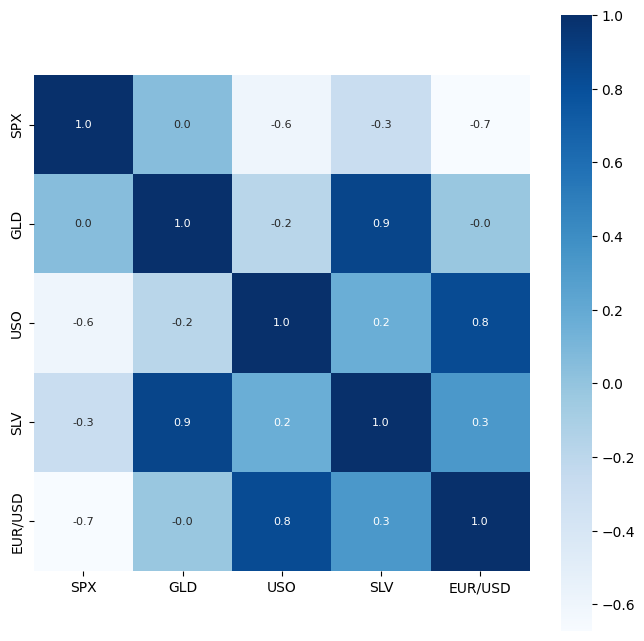

In [23]:
1 # constructing a heatmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar= True,square=True, fmt='.1f' , annot= True, annot_kws={'size': 8}, cmap='Blues')

In [24]:
1 # correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3991058685.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

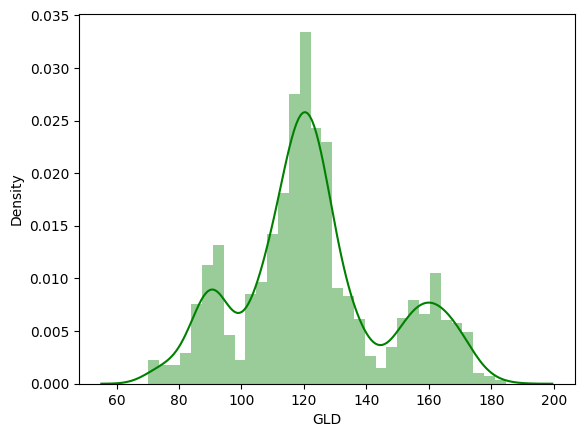

In [25]:
1 # checking the distribution of the GLD price
sns.histplot(gold_data['GLD'], color='green', kde=True)

In [28]:
# Splitting the Features and Target
X = gold_data.drop(['Date','GLD'] , axis = 1)
Y = gold_data['GLD']

In [29]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [30]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [31]:
# Splitting into Training data and Test Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [32]:
# Model Training : Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [35]:
# Model Evaluation

# prediction on Test Data

test_data_prediction = regressor.predict(X_test)

In [36]:
print(test_data_prediction)

[168.84490021  81.71449997 116.15960011 127.5084003  120.57140148
 155.03039732 150.07209849 125.95600046 117.38299872 125.86260076
 116.66850116 172.02410109 141.73329886 168.12989896 115.25450003
 117.65820033 140.41490297 170.21460115 159.59180293 162.42719855
 155.1861001  125.04620049 176.48849889 157.08460329 125.22060039
  93.56799957  78.24360001 120.53279998 119.12219964 167.41020018
  88.15160072 125.32800046  91.1351006  117.46650036 121.07679915
 136.57940085 115.56150114 115.18890091 147.43949967 107.18020114
 104.05300249  87.18739796 126.58270027 117.83700041 153.70519852
 119.82299973 108.39399992 108.04169815  93.12500032 127.07739792
  74.85620061 113.62269935 121.33989995 111.10429933 118.94109904
 120.47659955 159.7952999  167.74930112 146.90179732  85.88009851
  94.3095003   86.86999867  90.4976002  118.99830091 126.40210058
 127.5409999  170.09980019 122.3138992  117.41919893  98.38830045
 168.04200081 143.23309804 131.97950304 121.18450201 121.49339964
 119.80280

In [37]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)

In [38]:
print("R squared error : ", error_score)

R squared error :  0.989916336271659


In [39]:
# Compared the actual values and Predicted values in Plot

In [40]:
Y_test = list(Y_test)

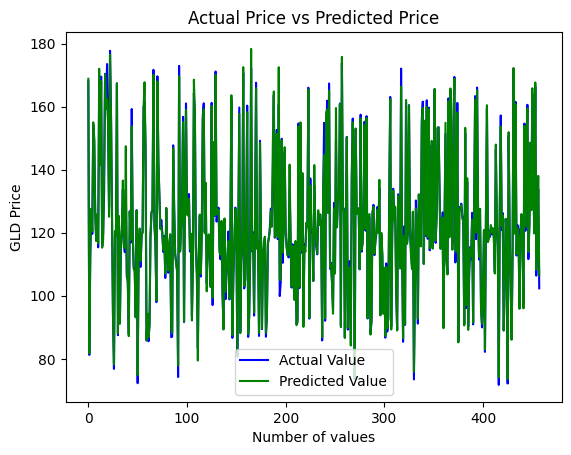

In [43]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()